In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2


C:\Users\123bb\AppData\Local\Temp\ipykernel_4256\4163410516.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="273322"
)

# Load data into a DataFrame
df = pd.read_sql("SELECT * FROM pizza_sales", conn)

# Close the connection
conn.close()



C:\Users\123bb\AppData\Local\Temp\ipykernel_4256\2469667957.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM pizza_sales", conn)


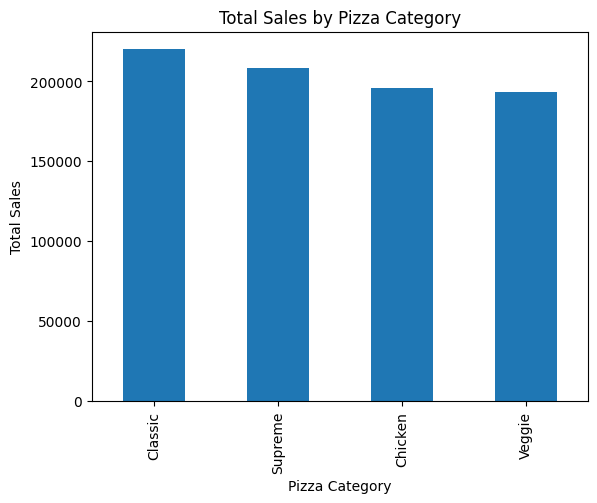

In [4]:
# Total sales by pizza category
sales_by_category = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.show()

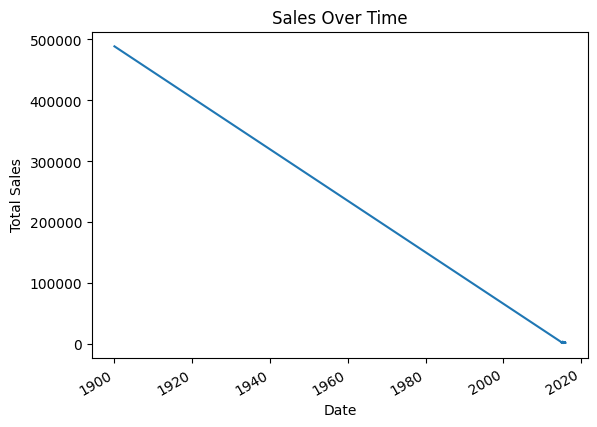

In [5]:
# Sales over time
df['order_date'] = pd.to_datetime(df['order_date'])
sales_over_time = df.groupby('order_date')['total_price'].sum()
sales_over_time.plot(kind='line')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()